# MC1
## Aufgabe 1
Erstelle in einem Jupyter-Notebook ein Programm, welches eine «Lineare Regression» mittels des Gradientenverfahrens umsetzt. Es soll dabei der einfache Fall mit einer Inputvariablen (x) und einer Outputvariablen (y) umgesetzt werden und mit dem zur Verfügung gestellten Datensatz («data_a1_mc1_vta_hs25.csv») trainiert werden. Verwende als Fehlerfunktion den mittleren quadratischen Fehler und passe die Parameter (w_0, w_1) der linearen Regression (y=w_1*x+w_0) gemäss dem Gradienten mit einer Vernünftigen Lernrate (mue) während ca. 50 Epochen an.

Vergleiche die gefundenen Werte der Regression mit der analytischen Berechnung (siehe ala).

### Bib import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Clean data

In [2]:
df = pd.read_csv("Data/data_a1_mc1_vta_hs25.csv", sep=";")
df.dropna(inplace=True)
df.head()

,x,y
0,0,-2.000
1,1,-1.595
2,2,-1.302
3,3,-1.103
4,4,-1.520


### 1. Plot

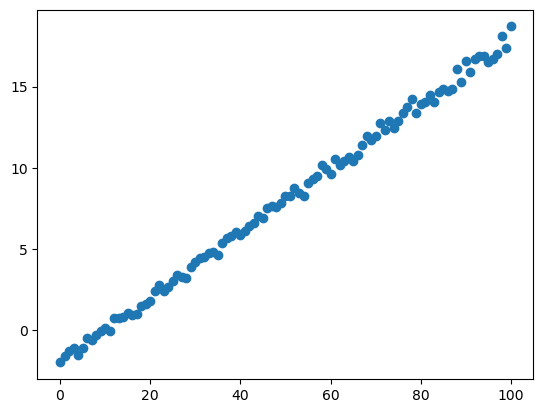

In [3]:
plt.scatter(y=df["y"], x=df["x"])
plt.show()

### Daten Reshape

In [4]:
x = df["x"].values.reshape(-1,1)
y = df["y"].values.reshape(-1,1)

### parameter initialisieren

In [5]:
w1, w0 = 0.0, 0.0
mue = 0.00015
epochs = 50

n = len(x)

### Gradient Descent Schleife

In [6]:
for epoch in range(epochs):
    y_pred = w1 * x + w0
    error = y - y_pred

    # Gradienten
    dw0 = -2/n * sum(error)
    dw1 = -2/n * sum(x * error)

    w0 -= mue * dw0
    w1 -= mue * dw1

    mse = (error**2).mean()
    print(f"Epoche {epoch+1}: MSE = {mse:.4f}")

Epoche 1: MSE = 97.8240
Epoche 2: MSE = 1.0518
Epoche 3: MSE = 1.0490
Epoche 4: MSE = 1.0489
Epoche 5: MSE = 1.0487
Epoche 6: MSE = 1.0486
Epoche 7: MSE = 1.0484
Epoche 8: MSE = 1.0483
Epoche 9: MSE = 1.0481
Epoche 10: MSE = 1.0480
Epoche 11: MSE = 1.0478
Epoche 12: MSE = 1.0477
Epoche 13: MSE = 1.0475
Epoche 14: MSE = 1.0474
Epoche 15: MSE = 1.0473
Epoche 16: MSE = 1.0471
Epoche 17: MSE = 1.0470
Epoche 18: MSE = 1.0468
Epoche 19: MSE = 1.0467
Epoche 20: MSE = 1.0465
Epoche 21: MSE = 1.0464
Epoche 22: MSE = 1.0462
Epoche 23: MSE = 1.0461
Epoche 24: MSE = 1.0459
Epoche 25: MSE = 1.0458
Epoche 26: MSE = 1.0456
Epoche 27: MSE = 1.0455
Epoche 28: MSE = 1.0454
Epoche 29: MSE = 1.0452
Epoche 30: MSE = 1.0451
Epoche 31: MSE = 1.0449
Epoche 32: MSE = 1.0448
Epoche 33: MSE = 1.0446
Epoche 34: MSE = 1.0445
Epoche 35: MSE = 1.0443
Epoche 36: MSE = 1.0442
Epoche 37: MSE = 1.0440
Epoche 38: MSE = 1.0439
Epoche 39: MSE = 1.0437
Epoche 40: MSE = 1.0436
Epoche 41: MSE = 1.0435
Epoche 42: MSE = 1.0433


### Lineare Regression

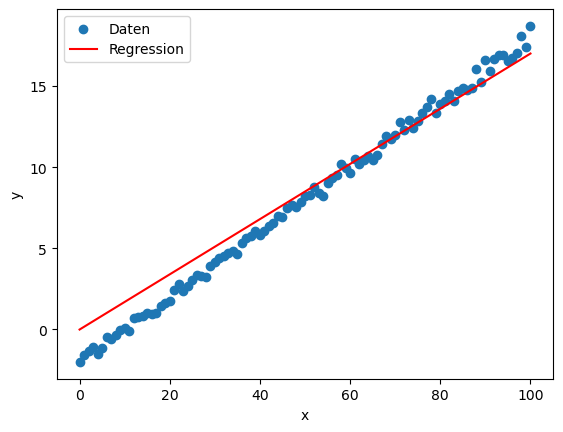

In [7]:
plt.scatter(x, y, label="Daten")
plt.plot(x, w1*x + w0, color='red', label="Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Gradientenfeld

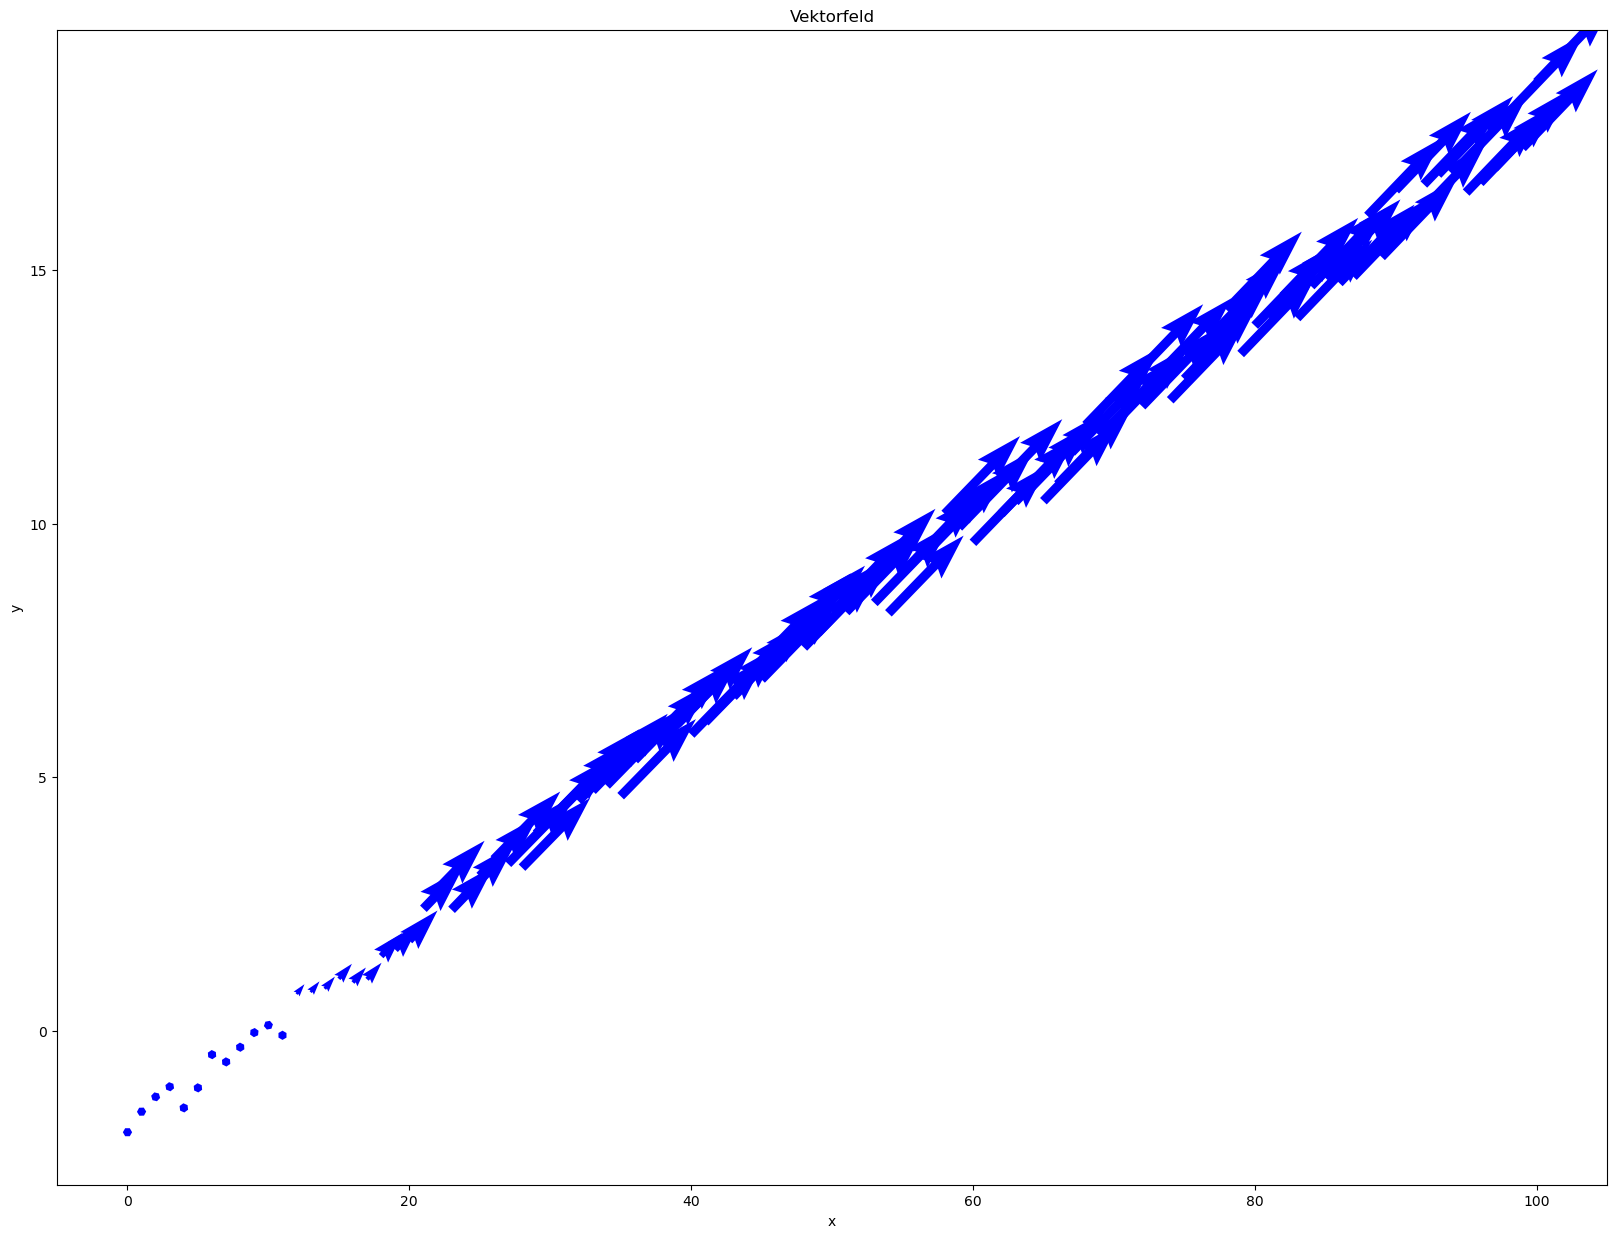

In [8]:
xy_clip = np.clip(x * y, -2, 100)
U = (1 + xy_clip) * np.exp(xy_clip)
V = x**2 * np.exp(xy_clip)

U_scaled = np.sign(U) * np.log1p(np.abs(U))
V_scaled = np.sign(V) * np.log1p(np.abs(V))

fig, ax = plt.subplots(figsize=(20,15))
Q = ax.quiver(x, y, U_scaled, V_scaled, units='width', color='blue')
ax.set_title('Vektorfeld')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.quiverkey(Q, X=0.9, Y=1.05, U=1, label=r'$1\,\mathrm{Einheit}$', labelpos='E')

plt.show()

### Analytische Berechnung mit der Normalengleichung

In [9]:
X = np.hstack((np.ones_like(x), x))
w_analytisch = np.linalg.inv(X.T @ X) @ X.T @ y

w0_analytisch = w_analytisch[0, 0]
w1_analytisch = w_analytisch[1, 0]

print(f"Analytische Lösung: b(w0) = {w0_analytisch:.4f}, m(w1) = {w1_analytisch:.4f}")
print(f"Gradient Descent:   b(w0) = {w0.item():.4f}, m(w1) = {w1.item():.4f}")


Analytische Lösung: b(w0) = -1.9454, m(w1) = 0.1990
Gradient Descent:   b(w0) = -0.0049, m(w1) = 0.1700


### Plot Gradient Descent vs. Normalengleichung

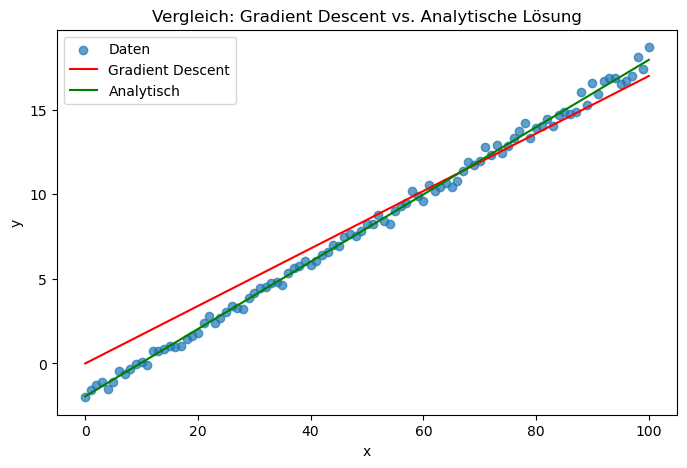

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Daten", alpha=0.7)
plt.plot(x, w1*x + w0, color='red', label="Gradient Descent")  # Linie vom Gradientenverfahren
plt.plot(x, w1_analytisch*x + w0_analytisch, color='green', label="Analytisch")  # analytische Linie
plt.xlabel("x")
plt.ylabel("y")
plt.title("Vergleich: Gradient Descent vs. Analytische Lösung")
plt.legend()
plt.show()

## Aufgabe 2

Erstelle ein einfaches neuronales Netz für drei Eingangswerte und einen Ausgabewert mit einem versteckten Layer. Das neuronale Netz soll für verschiedene Hintergrundfarben für die Schriftfarbe «hell» oder «dunkel» zurückliefern. Dabei soll diese Entscheidung basierend auf den RGBFarbwerten des Hintergrunds basieren.

Verwende für den versteckten Layer die ReLU-Aktivierungsfunktion und für die Ausgabe die Logistische Aktivierungsfunktion.

Erstelle eine «Forward Propagation» für eine Vorhersage und eine «Backward Propagation» welche den Fehler gemäss dem Gradienten auf die verschiedenen Parameterwerte des Netzwerks zurückrechnet.

Die Daten für das Anlernen des neuronalen Netzes findest du in der Datei «data_a2_mc1_vta_hs25.csv». Lerne das Netzwerk mit 100000 Durchläufen mittels stochastischem Gradientenabstiegs an.

## DF einlesen und vorbereiten

In [11]:
df_2 = pd.read_csv("Data/data_a2_mc1_vta_hs25.csv", sep=";")
df_2.dropna(inplace=True)

X = df_2[["RED", "GREEN", "BLUE"]].values / 255.0  # Normalisierung
y = df_2["LIGHT_OR_DARK_FONT_IND"].values.reshape(-1, 1)

## Netzwerkarchitektur definieren

In [12]:
input_size = 3      # R, G, B
hidden_size = 5     # Hidden Layer Neuronen
output_size = 1     # 1 Ausgabewert (hell/dunkel)
learning_rate = 0.01
epochs = 100_000

# Hidden Layer
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

# Output Layer
W2 = np.random.randn(hidden_size, output_size) * 0.01  # W'
b2 = np.zeros((1, output_size))                        # b'

print("Netzwerk initialisiert")

Netzwerk initialisiert


## Aktivierungsfunktion

In [13]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

## Training (Forward + Backward Propagation)

In [14]:
for epoch in range(epochs):
    # 1. Zufällige Stichprobe (stochastisch)
    i = np.random.randint(0, len(X))
    x_sample = X[i:i+1]
    y_sample = y[i:i+1]

    #Forward Propagation
    z1 = np.dot(x_sample, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    #Kostenfunktion
    loss = (a2 - y_sample) ** 2

    #Backward Propagation
    dC_da2 = 2 * (a2 - y_sample)
    da2_dz2 = sigmoid_derivative(z2)
    dz2_dW2 = a1.T
    dz2_da1 = W2
    da1_dz1 = relu_derivative(z1)

    # Gradienten berechnen
    dC_dW2 = np.dot(dz2_dW2, (dC_da2 * da2_dz2))
    dC_db2 = dC_da2 * da2_dz2
    dC_dW1 = np.dot(x_sample.T, (dC_da2 * da2_dz2).dot(dz2_da1.T) * da1_dz1)
    dC_db1 = (dC_da2 * da2_dz2).dot(dz2_da1.T) * da1_dz1

    #Parameterupdate
    W2 -= learning_rate * dC_dW2
    b2 -= learning_rate * dC_db2
    W1 -= learning_rate * dC_dW1
    b1 -= learning_rate * dC_db1

    if epoch % 10000 == 0:
        print(f"Epoche {epoch} - Verlust: {loss[0][0]:.6f}")


Epoche 0 - Verlust: 0.250048
Epoche 10000 - Verlust: 0.036061
Epoche 20000 - Verlust: 0.146632
Epoche 30000 - Verlust: 0.003766
Epoche 40000 - Verlust: 0.078996
Epoche 50000 - Verlust: 0.000005
Epoche 60000 - Verlust: 0.000000
Epoche 70000 - Verlust: 0.000500
Epoche 80000 - Verlust: 0.000622
Epoche 90000 - Verlust: 0.000191


## Vorhersagen für alle Daten & Klassifikation

In [15]:
def vorhersage(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a2

y_pred = vorhersage(X)
y_pred_class = (y_pred >= 0.5).astype(int)

correct = (y_pred_class == y)
accuracy = np.mean(correct) * 100
print(f"Genauigkeit: {accuracy:.2f}%")


Genauigkeit: 99.26%


## Visualisierung im RGB-Raum

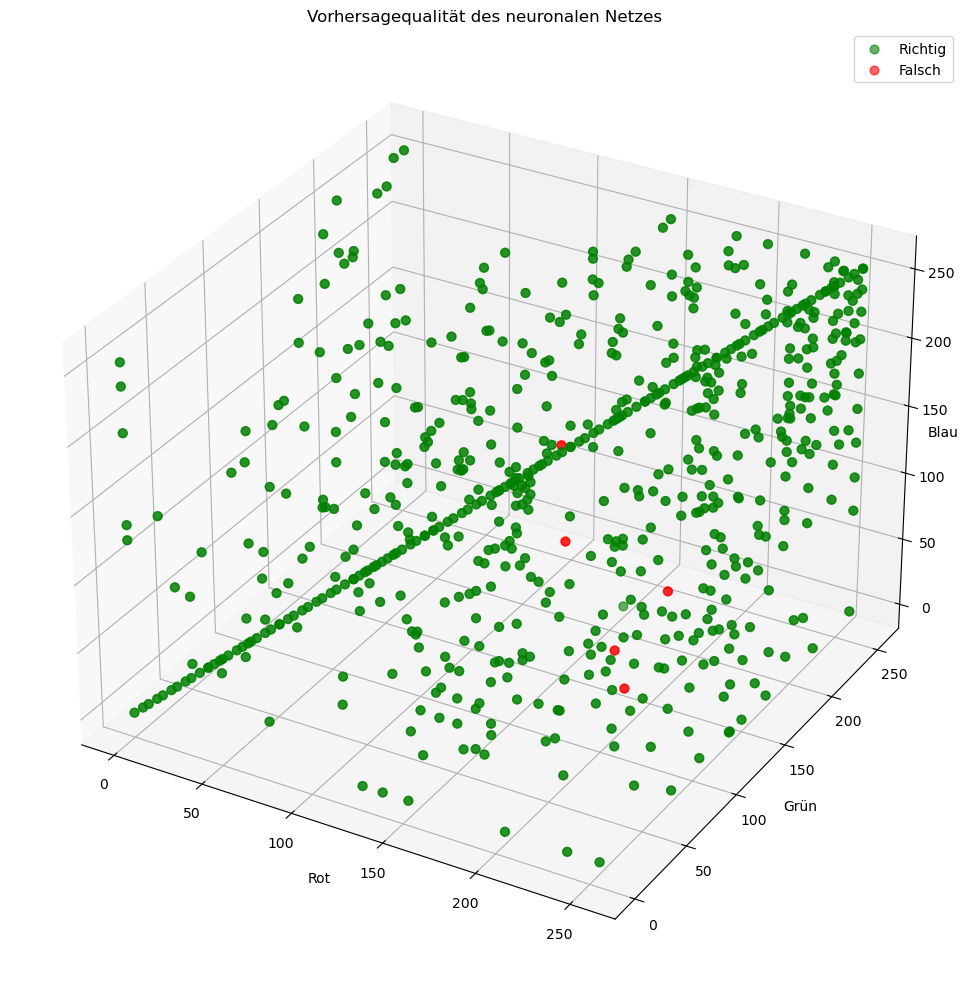

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X[correct[:, 0], 0] * 255,
    X[correct[:, 0], 1] * 255,
    X[correct[:, 0], 2] * 255,
    c='green', label='Richtig', s=40, alpha=0.6
)
ax.scatter(
    X[~correct[:, 0], 0] * 255,
    X[~correct[:, 0], 1] * 255,
    X[~correct[:, 0], 2] * 255,
    c='red', label='Falsch', s=40, alpha=0.6
)

ax.set_xlabel("Rot")
ax.set_ylabel("Grün")
ax.set_zlabel("Blau")
ax.set_title("Vorhersagequalität des neuronalen Netzes")
ax.set_xlabel("Rot")
ax.set_ylabel("Grün")
ax.set_zlabel("Blau", labelpad=-5)
ax.set_title("Vorhersagequalität des neuronalen Netzes")
ax.legend()

plt.tight_layout()
plt.show()

## Confusionmatrix und Classification Report


Confusion Matrix:


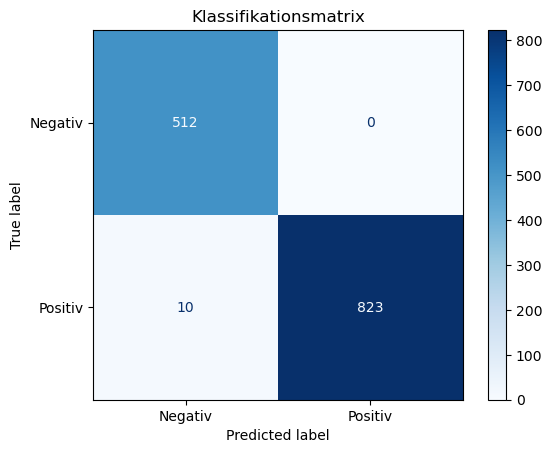


Classification Report:
              precision    recall  f1-score   support

  Dunkel (0)       0.98      1.00      0.99       512
    Hell (1)       1.00      0.99      0.99       833

    accuracy                           0.99      1345
   macro avg       0.99      0.99      0.99      1345
weighted avg       0.99      0.99      0.99      1345



In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm=confusion_matrix(y, y_pred_class)
print("\nConfusion Matrix:")
disp = 	ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=["Negativ", "Positiv"])
disp.plot(cmap="Blues")
plt.title("Klassifikationsmatrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y, y_pred_class, target_names=['Dunkel (0)', 'Hell (1)']))